In [1]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

/var/folders/v4/pcb5pkfn5h7b0vj_np_0db040000gn/T/ipykernel_18441/3828322551.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
import yfinance as yf
import datetime

In [4]:
stock=['TSLA','AAPL','AMD','^GSPC']
df=pd.DataFrame()
df = yf.download(stock, start='2016-9-29', end='2021-9-29')['Close']

[*********************100%***********************]  4 of 4 completed


# Simple Moving Average (SMA)


</n>Trading Stratergy :

Go long (= +1) when the shorter SMA is above the longer SMA.

Go short (= -1) when the shorter SMA is below the longer SMA.
</n>

In [5]:
df

,AAPL,AMD,TSLA,^GSPC
Date,,,,
2016-09-29,28.045000,6.670000,13.380000,2151.129883
2016-09-30,28.262501,6.910000,13.602000,2168.270020
2016-10-03,28.129999,6.950000,14.246667,2161.199951
2016-10-04,28.250000,6.970000,14.094000,2150.489990
2016-10-05,28.262501,6.780000,13.897333,2159.729980
...,...,...,...,...
2021-09-22,145.850006,104.379997,250.646667,4395.640137
2021-09-23,146.830002,106.150002,251.213333,4448.979980
2021-09-24,146.919998,105.800003,258.130005,4455.479980


In [6]:
SMA1 = 42  
SMA2 = 252  
ticker='AAPL'

In [7]:
data=df[[ticker]].copy()

In [8]:
data['SMA1'] = data[ticker].rolling(SMA1).mean()  
data['SMA2'] = data[ticker].rolling(SMA2).mean()  

<AxesSubplot: xlabel='Date'>

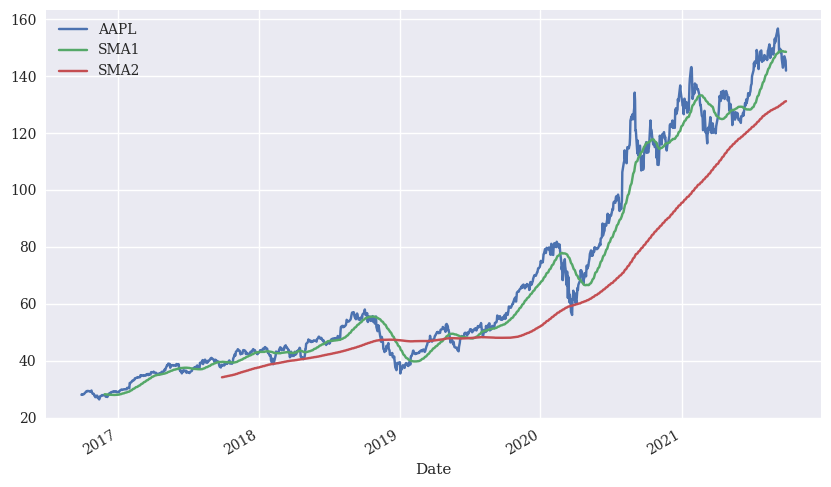

In [9]:
data.plot(figsize=(10, 6))


In [10]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  


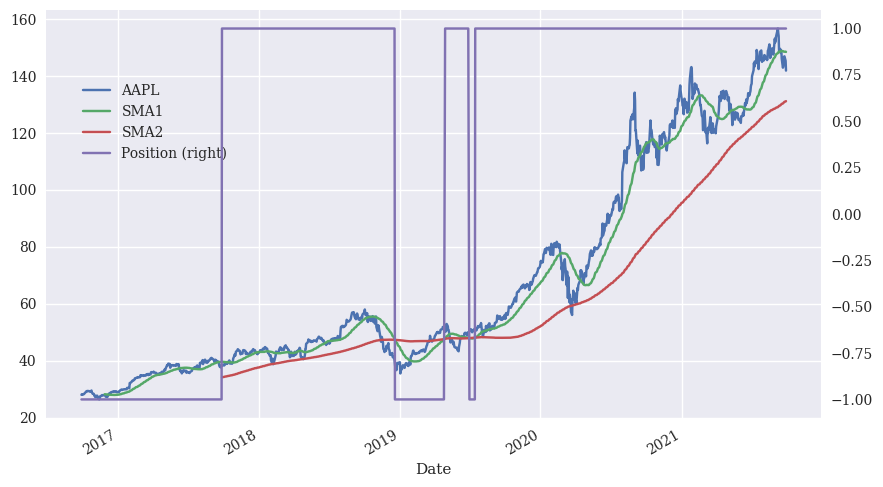

In [11]:
ax = data.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [12]:
data['Returns'] = np.log(data[ticker] / data[ticker].shift(1))  
# Calculates the log returns of the stock 
# (i.e., the benchmark investment).

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']  

In [14]:
data.round(4).head()

,AAPL,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2016-09-29,28.0450,NaN,NaN,-1,NaN,NaN
2016-09-30,28.2625,NaN,NaN,-1,0.0077,-0.0077
2016-10-03,28.1300,NaN,NaN,-1,-0.0047,0.0047
2016-10-04,28.2500,NaN,NaN,-1,0.0043,-0.0043
2016-10-05,28.2625,NaN,NaN,-1,0.0004,-0.0004


In [15]:
data.dropna(inplace=True)

In [16]:
data.round(4).head()

,AAPL,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2017-09-28,38.3200,39.6163,34.1996,1,-0.0062,0.0062
2017-09-29,38.5300,39.6405,34.2412,1,0.0055,0.0055
2017-10-02,38.4525,39.6207,34.2817,1,-0.0020,-0.0020
2017-10-03,38.6200,39.6142,34.3233,1,0.0043,0.0043
2017-10-04,38.3700,39.5969,34.3635,1,-0.0065,-0.0065


In [17]:
np.exp(data[['Returns', 'Strategy']].sum())  
#Sums up the log returns for the strategy and the benchmark 
# investment and calculates the exponential value to arrive at the 
# absolute performance.

Returns     3.680477
Strategy    2.126446
dtype: float64

In [18]:
#The stratergy clearly underperforms for Tesla 
# Moving averages draw trends from past price information only. 
# Like any type of technical analysis tool, chart indicators don't 
# take into account changes in fundamental factors that may affect a 
# stock's future performance, such as new competitors, 
# higher or lower demand for products in the industry, and changes 
# in the managerial structure of the company. 



In [19]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5 
# Calculates the annualized volatility for the strategy and 
# the benchmark investment.

Returns     0.326792
Strategy    0.327221
dtype: float64

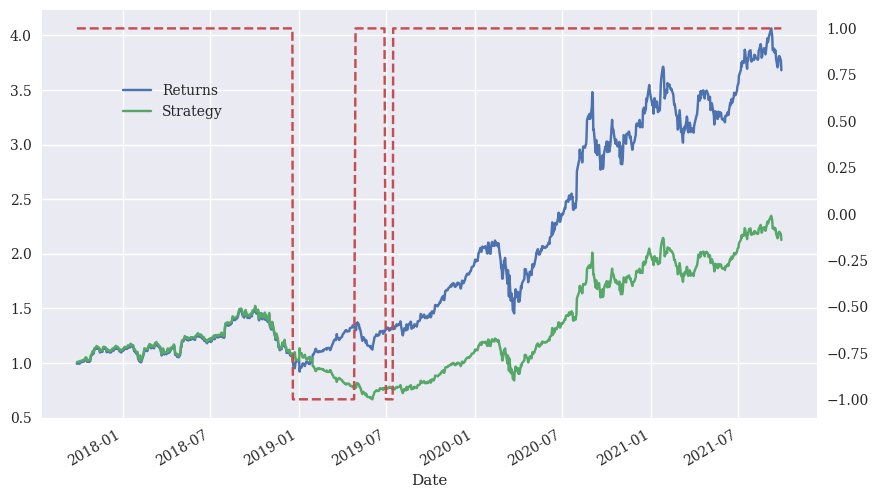

In [20]:
ax = data[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));


</n>Optimization</n>

In [21]:
from itertools import product

In [22]:
sma1 = range(20, 61, 4)  
sma2 = range(180, 281, 10)  

In [23]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):  
    data = pd.DataFrame(df[ticker])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[ticker] / data[ticker].shift(1))
    data['SMA1'] = data[ticker].rolling(SMA1).mean()
    data['SMA2'] = data[ticker].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
                {'SMA1': SMA1, 'SMA2': SMA2,
                 'MARKET': perf['Returns'],
                 'STRATEGY': perf['Strategy'],
                 'OUT': perf['Strategy'] - perf['Returns']},
                 index=[0]), ignore_index=True)  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/v4/pcb5pkfn5h7b0vj_np_0db040000gn/T/ipykernel_18441/807937380.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/v4/pcb5pkfn5h7b0vj_np_0db040000gn/T/ipykernel_18441/807937380.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [24]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [25]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
22,28,180,3.989878,3.287413,-0.702466
113,60,210,3.816581,2.842502,-0.974078
105,56,240,3.528783,2.551419,-0.977364
104,56,230,3.515452,2.535990,-0.979462
114,60,220,3.551079,2.543380,-1.007699
8,20,260,3.641052,2.553671,-1.087381
103,56,220,3.551079,2.435171,-1.115908


</n>Random Walk Hypothesis</n>

In [26]:
ticker2 = '^GSPC'

In [27]:
df2=df[[ticker2]].copy()

In [28]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)  
    data[col] = data[ticker].shift(lag)  
    cols.append(col)  

In [29]:
data.head(7)

,AAPL,Returns,SMA1,SMA2,Position,Strategy,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,
2017-11-08,44.060001,0.008147,39.921208,34.839241,1,0.008147,NaN,NaN,NaN,NaN,NaN
2017-11-09,43.970001,-0.002045,39.983417,34.895339,1,-0.002045,44.060001,NaN,NaN,NaN,NaN
2017-11-10,43.667500,-0.006904,40.053458,34.950830,1,-0.006904,43.970001,44.060001,NaN,NaN,NaN
2017-11-13,43.492500,-0.004016,40.122083,35.005268,1,-0.004016,43.667500,43.970001,44.060001,NaN,NaN
2017-11-14,42.834999,-0.015233,40.180958,35.057312,1,-0.015233,43.492500,43.667500,43.970001,44.060001,NaN
2017-11-15,42.270000,-0.013278,40.219708,35.106589,1,-0.013278,42.834999,43.492500,43.667500,43.970001,44.060001
2017-11-16,42.775002,0.011876,40.266042,35.157518,1,0.011876,42.270000,42.834999,43.492500,43.667500,43.970001


In [30]:
data.dropna(inplace=True)

In [31]:
reg = np.linalg.lstsq(data[cols], data[ticker], rcond=-1)[0]

In [32]:
reg.round(3)

array([ 0.894,  0.122, -0.054,  0.033,  0.007])

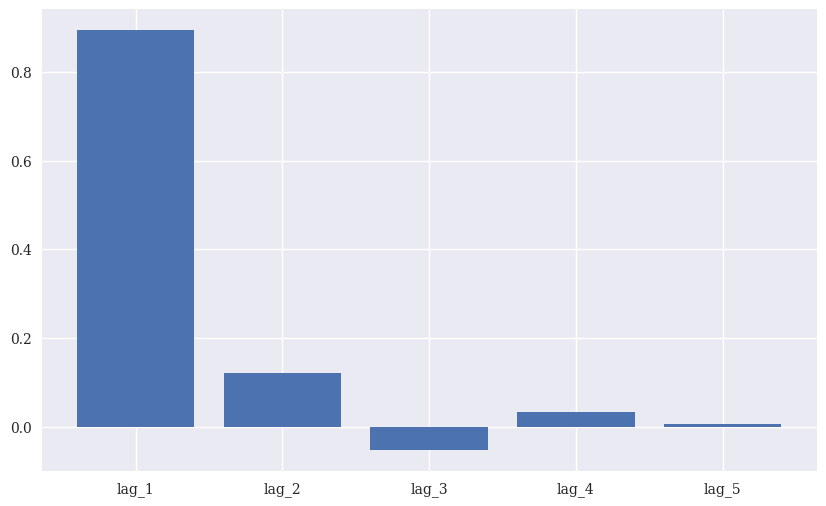

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(cols, reg);


In [34]:
data['Prediction'] = np.dot(data[cols], reg)

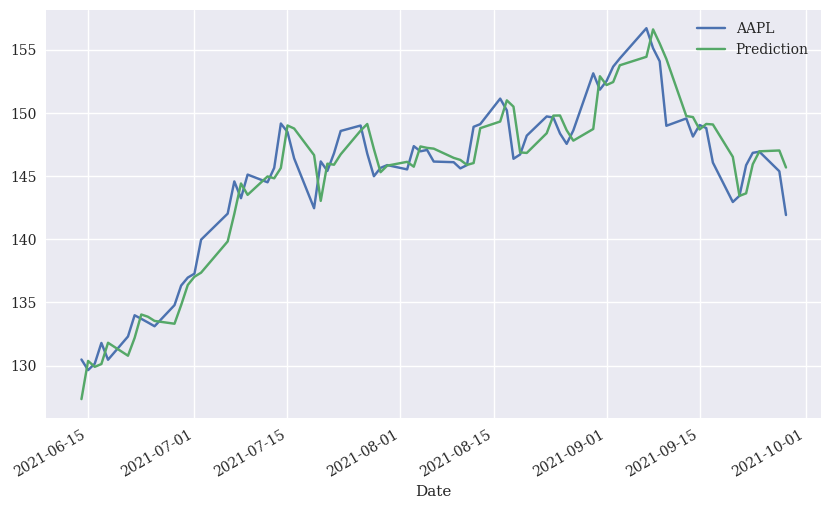

In [35]:
data[[ticker,'Prediction']].iloc[-75:].plot(figsize=(10, 6));

# Linear OLS Regression

In [36]:
# Linear OLS regression to predict the direction of market movements
# based on historical log returns. For simplicity, only two features 
# are used. The first feature (lag_1) represents the log-returns of the 
# financial time series lagged by one day. The second feature (lag_2) lags 
# the log returns by two days. Log returns—in contrast to prices—are generally stationary, 
# which is often necessary for applying statistical and ML algorithms.

In [37]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%config InlineBackend.figure_format = 'svg'

/var/folders/v4/pcb5pkfn5h7b0vj_np_0db040000gn/T/ipykernel_18441/3267769778.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [38]:
symbol='AAPL'
data = pd.DataFrame(df[symbol])
data['returns'] = np.log(data / data.shift(1))
data.dropna(inplace=True)
data['direction'] = np.sign(data['returns']).astype(int)
data.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,AAPL,returns,direction
Date,,,
2016-09-30,28.262501,0.007725,1
2016-10-03,28.129999,-0.004699,-1
2016-10-04,28.250000,0.004257,1
2016-10-05,28.262501,0.000442,1
2016-10-06,28.472500,0.007403,1


<AxesSubplot: >

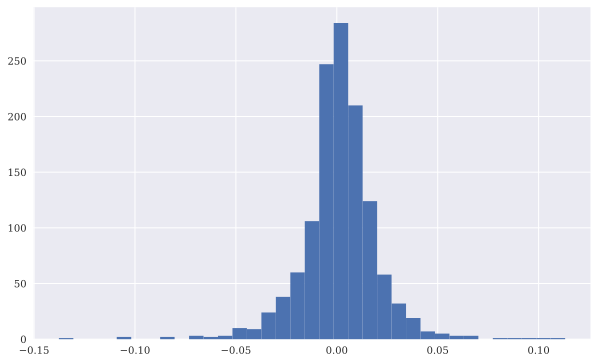

In [39]:
data['returns'].hist(bins=35, figsize=(10, 6))

In [40]:
lags = 2
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)
create_lags(data)
data.dropna(inplace=True)
data.head()

,AAPL,returns,direction,lag_1,lag_2
Date,,,,,
2016-10-04,28.250000,0.004257,1,-0.004699,0.007725
2016-10-05,28.262501,0.000442,1,0.004257,-0.004699
2016-10-06,28.472500,0.007403,1,0.000442,0.004257
2016-10-07,28.514999,0.001492,1,0.007403,0.000442
2016-10-10,29.012501,0.017297,1,0.001492,0.007403


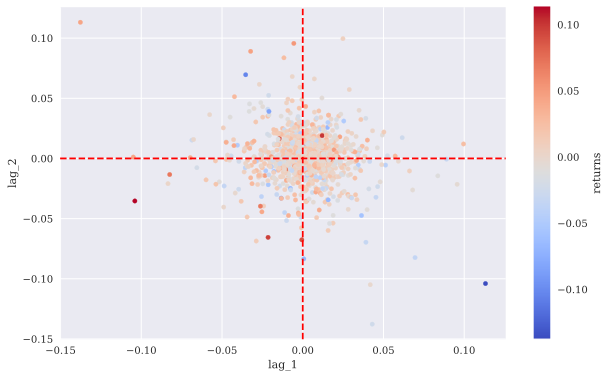

In [41]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns', 
                  cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');

In [42]:
from sklearn.linear_model import LinearRegression  

In [43]:
# The regression is implemented on the log returns directly …
# … and on the direction data which is of primary interest.

model = LinearRegression() 

data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])  


data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])  

In [44]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(
            data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)
# The real-valued predictions are transformed to directional 
# values (+1, -1).

In [45]:
data['pos_ols_1'].value_counts() 

 1    964
-1    291
Name: pos_ols_1, dtype: int64

In [46]:
data['pos_ols_2'].value_counts()  


 1    1140
-1     115
Name: pos_ols_2, dtype: int64

In [47]:
(data['pos_ols_1'].diff() != 0).sum()  


463

In [48]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns         5.044792
strat_ols_1     4.414943
strat_ols_2    10.639068
dtype: float64

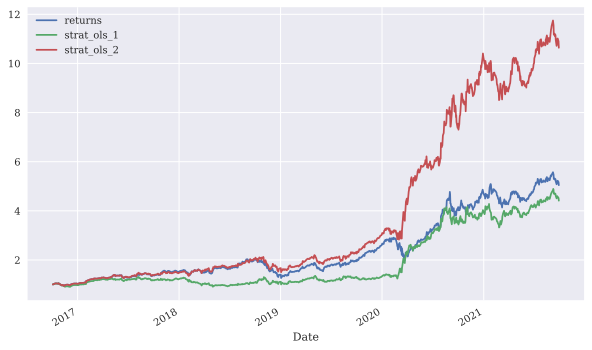

In [49]:
(data['direction'] == data['pos_ols_1']).value_counts()  
(data['direction'] == data['pos_ols_2']).value_counts()  
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

# Clustering

In [50]:
from sklearn.cluster import KMeans

In [51]:
model = KMeans(n_clusters=2, random_state=0)  
model.fit(data[cols])

KMeans(n_clusters=2, random_state=0)

In [52]:
data['pos_clus'] = model.predict(data[cols])
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)  
data['pos_clus'].values

array([ 1, -1,  1, ...,  1,  1,  1])

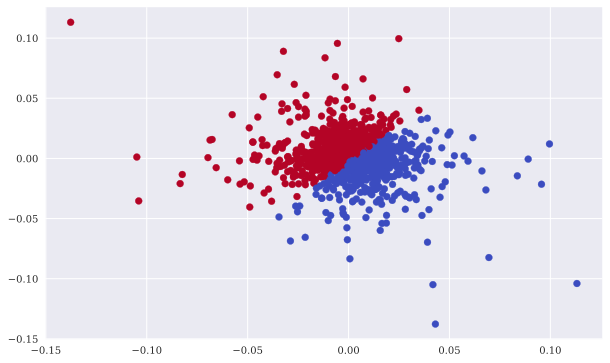

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1],
            c=data['pos_clus'], cmap='coolwarm');

In [54]:
data['strat_clus'] = data['pos_clus'] * data['returns']
data[['returns', 'strat_clus']].sum().apply(np.exp)


returns       5.044792
strat_clus    0.972438
dtype: float64

In [55]:
(data['direction'] == data['pos_clus']).value_counts()


True     660
False    595
dtype: int64

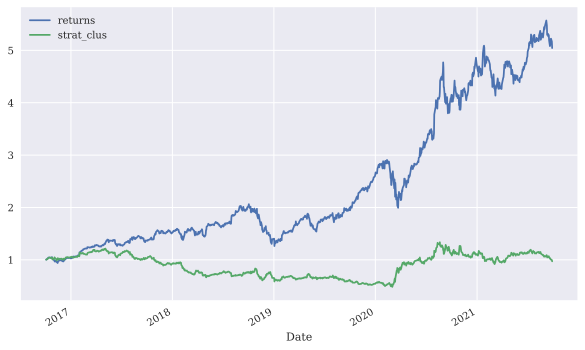

In [56]:
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10, 6));

# Frequency Approach

In [57]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)  
        cols_bin.append(col_bin)


In [58]:
create_bins(data)
data[cols_bin + ['direction']].head()  

,lag_1_bin,lag_2_bin,direction
Date,,,
2016-10-04,0,1,1
2016-10-05,1,0,1
2016-10-06,1,1,1
2016-10-07,1,1,1
2016-10-10,1,1,1


In [59]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()  

lag_1_bin  lag_2_bin  direction
0          0          -1           105
                       1           145
           1          -1           146
                       0             1
                       1           176
1          0          -1           156
                       0             2
                       1           164
           1          -1           166
                       1           194
dtype: int64

In [60]:
res = grouped['direction'].size().unstack(fill_value=0)  

In [61]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]  

In [62]:
res.style.apply(highlight_max, axis=1)  


In [63]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)  

In [64]:
(data['direction'] == data['pos_freq']).value_counts()

True     651
False    604
dtype: int64

In [65]:
data['strat_freq'] = data['pos_freq'] * data['returns']
data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       5.044792
strat_freq    1.914853
dtype: float64

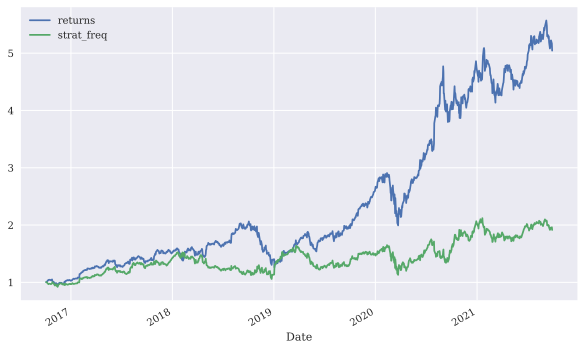

In [66]:
data[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(10, 6));

# Classification Algorithm 

In [67]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [68]:
C = 1
models = {
    'log_reg': linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm': SVC(C=C)
}

In [69]:
def fit_models(data):  
    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
            for model in models.keys()} 
    

In [70]:
fit_models(data)

In [71]:
def derive_positions(data):  
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

In [72]:
derive_positions(data)

In [73]:
def evaluate_strats(data):  
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model 
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
    sel.insert(0, 'returns')
    

In [74]:
evaluate_strats(data)

In [75]:
sel.insert(1, 'strat_freq')

In [76]:
data[sel].sum().apply(np.exp)  

returns           5.044792
strat_freq        1.914853
strat_log_reg     5.044792
strat_gauss_nb    5.044792
strat_svm         5.044792
dtype: float64

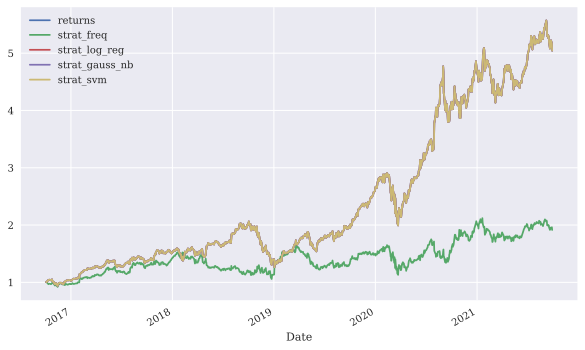

In [77]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [78]:
data = pd.DataFrame(df[symbol])


In [79]:
data['returns'] = np.log(data / data.shift(1))
data['direction'] = np.sign(data['returns'])
lags = 5  
create_lags(data)
data.dropna(inplace=True)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [80]:
create_bins(data)  
cols_bin

['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']

In [81]:
data[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2016-10-07,1,1,1,0,1
2016-10-10,1,1,1,1,0
2016-10-11,1,1,1,1,1
2016-10-12,1,1,1,1,1
2016-10-13,1,1,1,1,1


In [82]:
data.dropna(inplace=True)

In [83]:
fit_models(data)

In [84]:
derive_positions(data)
evaluate_strats(data)
data[sel].sum().apply(np.exp)

returns            4.984108
strat_log_reg      4.446964
strat_gauss_nb     1.629255
strat_svm         11.535748
dtype: float64

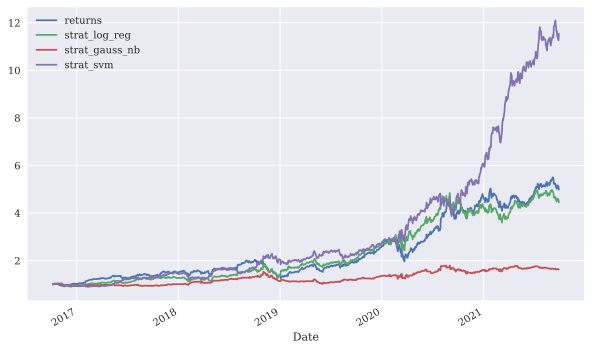

In [85]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));


In [86]:
mu = data['returns'].mean()  
v = data['returns'].std() 

In [87]:
bins = [mu - v, mu, mu + v]  
bins  

[-0.017796653978308243, 0.001282950779428971, 0.020362555537166184]

In [88]:
create_bins(data, bins)
data[cols_bin].head()


,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2016-10-07,2,1,2,1,2
2016-10-10,2,2,1,2,1
2016-10-11,2,2,2,1,2
2016-10-12,2,2,2,2,1
2016-10-13,2,2,2,2,2


In [89]:
fit_models(data)
derive_positions(data)
evaluate_strats(data)
data[sel].sum().apply(np.exp)

returns             4.984108
strat_log_reg      11.271153
strat_gauss_nb      5.431697
strat_svm         111.059782
dtype: float64

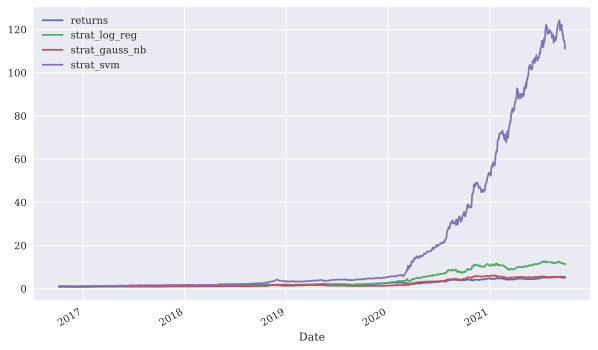

In [90]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [91]:
split = int(len(data) * 0.5)
train = data.iloc[:split].copy()
fit_models(train)  
test = data.iloc[split:].copy()  
derive_positions(test)  
evaluate_strats(test)  
test[sel].sum().apply(np.exp)

returns           2.900710
strat_log_reg     3.087298
strat_gauss_nb    2.329665
strat_svm         6.525649
dtype: float64

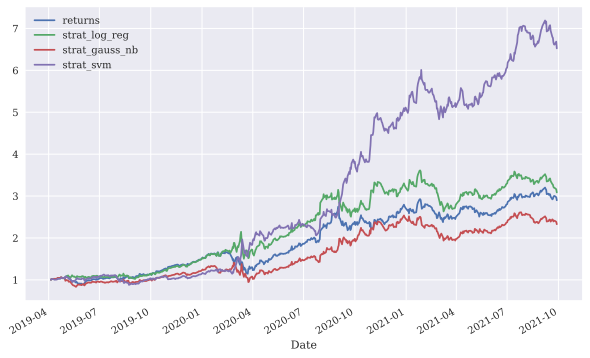

In [92]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [93]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.5,
                               shuffle=True, random_state=100)
train = train.copy().sort_index()  
train[cols_bin].head()
test = test.copy().sort_index()  
fit_models(train)
derive_positions(test)
evaluate_strats(test)
test[sel].sum().apply(np.exp)

returns           2.799856
strat_log_reg     3.022828
strat_gauss_nb    2.538186
strat_svm         1.031376
dtype: float64

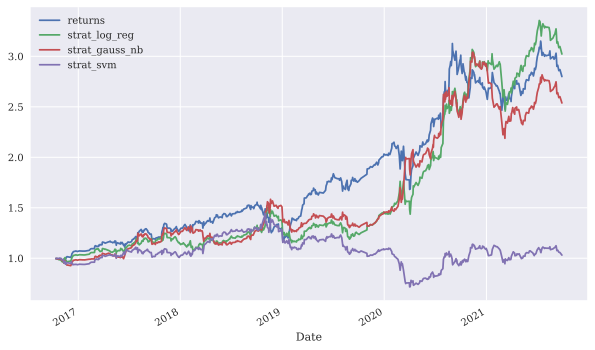

In [94]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));


# DNN with scikit-learn

In [95]:
from sklearn.neural_network import MLPClassifier


In [96]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=2 * [250], random_state=1)

In [97]:
%time model.fit(data[cols_bin], data['direction'])

CPU times: user 18.4 s, sys: 5.72 s, total: 24.1 s
Wall time: 4.32 s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[250, 250], random_state=1,
              solver='lbfgs')

In [98]:
data['pos_dnn_sk'] = model.predict(data[cols_bin])

In [99]:
data['strat_dnn_sk'] = data['pos_dnn_sk'] * data['returns']
data[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns            4.984108
strat_dnn_sk    4434.266881
dtype: float64

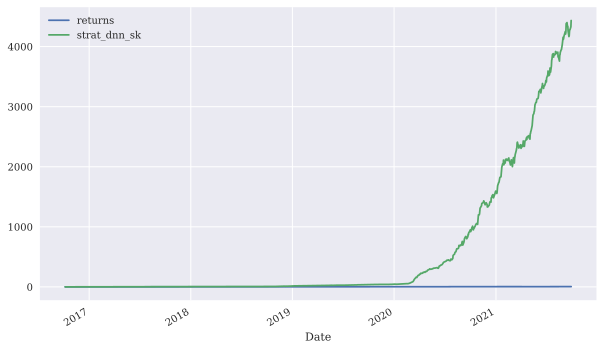

In [100]:
data[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [101]:
train, test = train_test_split(data, test_size=0.5, random_state=100)
train = train.copy().sort_index()
test = test.copy().sort_index()
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
                     hidden_layer_sizes=3 * [500], random_state=1)  
%time model.fit(train[cols_bin], train['direction'])

CPU times: user 3min 27s, sys: 1min 13s, total: 4min 41s
Wall time: 51.4 s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[500, 500, 500], max_iter=500,
              random_state=1, solver='lbfgs')

In [102]:
test['pos_dnn_sk'] = model.predict(test[cols_bin])
test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['returns']
test[['returns', 'strat_dnn_sk']].sum().apply(np.exp)


returns         2.799856
strat_dnn_sk    1.669425
dtype: float64

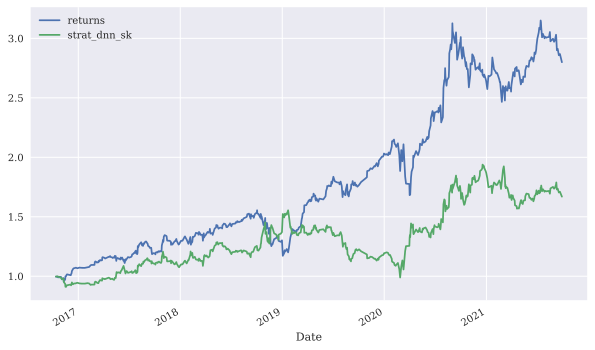

In [103]:
test[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));

# DNN with Keras & TensorFlow Backend

In [104]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential


2023-02-20 21:58:41.994945: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [105]:
def create_model():
    np.random.seed(100)
    tf.random.set_seed(100)
    model = Sequential()
    model.add(Dense(16, activation='relu', input_dim=lags))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [106]:
data_ = (data - data.mean()) / data.std()
data['direction_'] = np.where(data['direction'] == 1, 1, 0)

In [107]:
model = create_model()

In [108]:
%%time
model.fit(data_[cols], data['direction_'],
          epochs=50, verbose=False)

CPU times: user 3.47 s, sys: 390 ms, total: 3.86 s
Wall time: 3.01 s


In [109]:
model.evaluate(data_[cols], data['direction_'])

40/40 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6062


[0.6588040590286255, 0.6062300205230713]

In [110]:
pred = np.where(model.predict(data_[cols]) > 0.5, 1, 0) 
pred[:10].flatten()

40/40 [==============================] - 0s 1ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [111]:
data['pos_dnn_ke'] = np.where(pred > 0, 1, -1)  
data['strat_dnn_ke'] = data['pos_dnn_ke'] * data['returns']

In [112]:
data[['returns', 'strat_dnn_ke']].sum().apply(np.exp)


returns          4.984108
strat_dnn_ke    58.382017
dtype: float64

<AxesSubplot: xlabel='Date'>

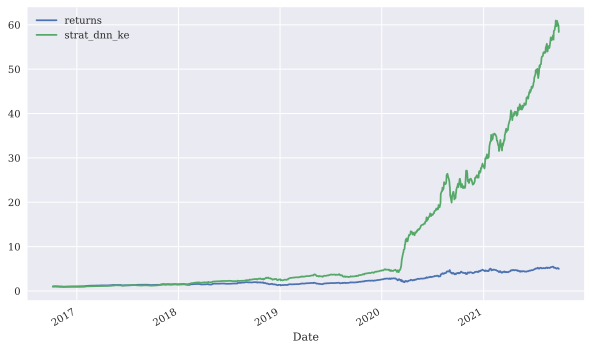

In [113]:
data[['returns', 'strat_dnn_ke']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))

In [114]:
mu, std = train.mean(), train.std()
train_ = (train - mu) / mu.std()
model = create_model()
train['direction_'] = np.where(train['direction'] > 0, 1, 0)


In [115]:
%%time
model.fit(train_[cols], train['direction_'],
          epochs=50, verbose=False)

CPU times: user 2.12 s, sys: 220 ms, total: 2.34 s
Wall time: 1.88 s


In [116]:
test_ = (test - mu) / std

In [117]:
test['direction_'] = np.where(test['direction'] > 0, 1, 0)

In [118]:
model.evaluate(test_[cols], test['direction_'])

20/20 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5383


[0.6907976269721985, 0.5383386611938477]

In [119]:
pred = np.where(model.predict(test_[cols]) > 0.5, 1, 0) 
pred[:10].flatten()

20/20 [==============================] - 0s 1ms/step


array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [120]:
test['pos_dnn_ke'] = np.where(pred > 0, 1, -1)

In [121]:
test['strat_dnn_ke'] = test['pos_dnn_ke'] * test['returns']

In [122]:
test[['returns', 'strat_dnn_sk', 'strat_dnn_ke']].sum().apply(np.exp)

returns         2.799856
strat_dnn_sk    1.669425
strat_dnn_ke    1.781585
dtype: float64

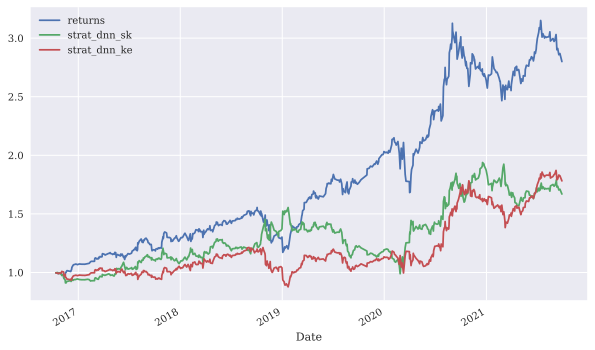

In [123]:
test[['returns', 'strat_dnn_sk', 'strat_dnn_ke']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));